# Data Visualization Notebook


## Holly Frew
## April 2022


In [1]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/holly/Downloads/House pricing.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATISTIC     2352 non-null   object 
 1   Statistic     2352 non-null   object 
 2   TLIST(Q1)     2352 non-null   int64  
 3   Quarter       2352 non-null   object 
 4   C02343V02817  2352 non-null   object 
 5   Area          2352 non-null   object 
 6   UNIT          2352 non-null   object 
 7   VALUE         2268 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 147.1+ KB


In [4]:
df['Year'] = pd.DatetimeIndex(df['Quarter']).year

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATISTIC     2352 non-null   object 
 1   Statistic     2352 non-null   object 
 2   TLIST(Q1)     2352 non-null   int64  
 3   Quarter       2352 non-null   object 
 4   C02343V02817  2352 non-null   object 
 5   Area          2352 non-null   object 
 6   UNIT          2352 non-null   object 
 7   VALUE         2268 non-null   float64
 8   Year          2352 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 165.5+ KB


In [6]:
df.shape

(2352, 9)

In [7]:
df.head(5)

,STATISTIC,Statistic,TLIST(Q1),Quarter,C02343V02817,Area,UNIT,VALUE,Year
0,HSQ06C1,New House Prices,19751,1975Q1,-,National,Euro,11887.0,1975
1,HSQ06C1,New House Prices,19751,1975Q1,01,Dublin,Euro,11858.0,1975
2,HSQ06C1,New House Prices,19751,1975Q1,02,Cork,Euro,10667.0,1975
3,HSQ06C1,New House Prices,19751,1975Q1,03,Galway,Euro,13519.0,1975
4,HSQ06C1,New House Prices,19751,1975Q1,04,Limerick,Euro,12565.0,1975


### Organising Null Values

In [8]:
nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['VALUE']


In [9]:
import statistics

In [10]:
df['VALUE'].fillna(df['VALUE'].median(), inplace=True)

In [11]:
df.isnull().sum()

STATISTIC       0
Statistic       0
TLIST(Q1)       0
Quarter         0
C02343V02817    0
Area            0
UNIT            0
VALUE           0
Year            0
dtype: int64

### Areas

In [12]:
df.Area.unique()

array(['National', 'Dublin', 'Cork', 'Galway', 'Limerick', 'Waterford',
       'Other areas'], dtype=object)

In [13]:
area_value = df.groupby('Area')[['VALUE']].sum()
print(area_value.sort_values(by = ['VALUE']))

                  VALUE
Area                   
Waterford    38690308.0
Limerick     39750864.0
Other areas  41472024.0
Galway       44933272.0
Cork         45150602.0
National     48091526.0
Dublin       60293345.0


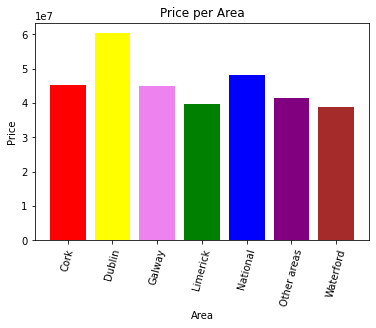

In [14]:
colors = ['red', 'yellow', 'violet', 'green', 'blue', 'purple', 'brown']
fig, ax = plt.subplots()
ax.bar(area_value.index, area_value["VALUE"], color = colors)
plt.xticks(rotation=75)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price per Area');

### Housing Type

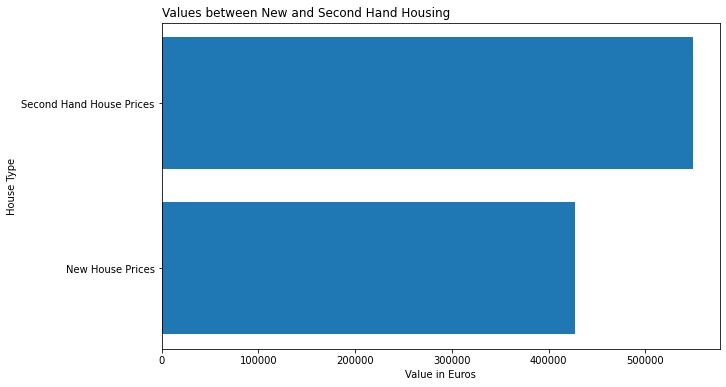

In [15]:
fig, ax = plt.subplots(figsize =(10, 6))
ax.set_title("Values between New and Second Hand Housing", loc ='left')
ax.set_ylabel("House Type")
ax.set_xlabel("Value in Euros"); 
# Horizontal Bar Plot
ax.barh(df["Statistic"], df["VALUE"]);

### Seaborn 

In [18]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("C:/Users/holly/Downloads/House pricing.csv")

In [20]:
df['Year'] = pd.DatetimeIndex(df['Quarter']).year

In [21]:
import statistics

In [22]:
df['VALUE'].fillna(df['VALUE'].median(), inplace=True)

### Differences between different areas and values and housing stock

In [23]:
df.head()

,STATISTIC,Statistic,TLIST(Q1),Quarter,C02343V02817,Area,UNIT,VALUE,Year
0,HSQ06C1,New House Prices,19751,1975Q1,-,National,Euro,11887.0,1975
1,HSQ06C1,New House Prices,19751,1975Q1,01,Dublin,Euro,11858.0,1975
2,HSQ06C1,New House Prices,19751,1975Q1,02,Cork,Euro,10667.0,1975
3,HSQ06C1,New House Prices,19751,1975Q1,03,Galway,Euro,13519.0,1975
4,HSQ06C1,New House Prices,19751,1975Q1,04,Limerick,Euro,12565.0,1975


In [24]:
natdf= df[["Year", "Area","Statistic", "VALUE"]]

In [25]:
natdf.head()

,Year,Area,Statistic,VALUE
0,1975,National,New House Prices,11887.0
1,1975,Dublin,New House Prices,11858.0
2,1975,Cork,New House Prices,10667.0
3,1975,Galway,New House Prices,13519.0
4,1975,Limerick,New House Prices,12565.0


In [124]:
nationaldf = natdf[natdf['Area']=='National']
nationaldf

,Year,Area,Statistic,VALUE
0,1975,National,New House Prices,11887.0
7,1975,National,New House Prices,12837.0
14,1975,National,New House Prices,13269.0
21,1975,National,New House Prices,13892.0
28,1976,National,New House Prices,14738.0
...,...,...,...,...
2317,2015,National,Second Hand House Prices,263616.0
2324,2016,National,Second Hand House Prices,264258.0
2331,2016,National,Second Hand House Prices,277452.0
2338,2016,National,Second Hand House Prices,276759.0


<AxesSubplot:xlabel='Year', ylabel='VALUE'>

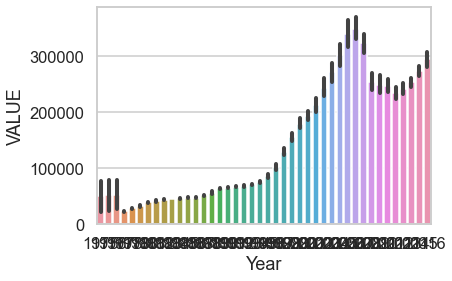

In [151]:
sns.barplot(x ='Year', y ='VALUE',data =nationaldf)

In [ ]:
years = list (map(str, range(2012, 2017))) 
years

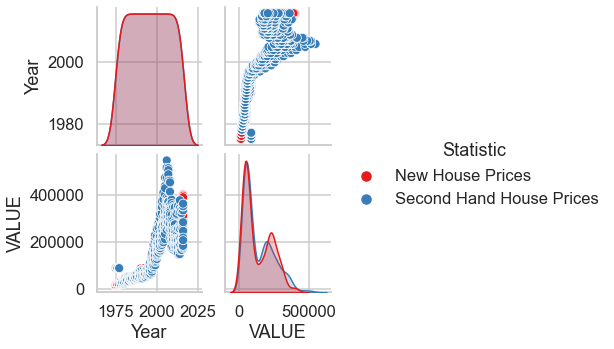

In [152]:
sns.pairplot(natdf, hue="Statistic", palette="Set1" )

In [153]:
prices_2010=natdf.loc[natdf["Year"]==2010]

In [154]:
prices_2016=natdf.loc[natdf["Year"]==2016]

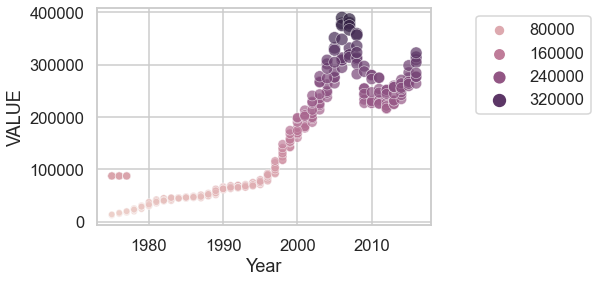

In [155]:
sns.scatterplot(data=nationaldf, x='Year', y='VALUE', alpha=0.7, hue='VALUE', size='VALUE')
plt.legend(loc="upper right", bbox_to_anchor=(1.5,1))

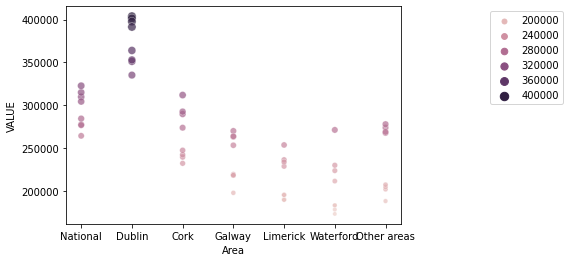

In [29]:
sns.scatterplot(data=prices_2016, x='Area', y='VALUE', alpha=0.7, hue='VALUE', size='VALUE')
plt.legend(loc="upper right", bbox_to_anchor=(1.5,1))

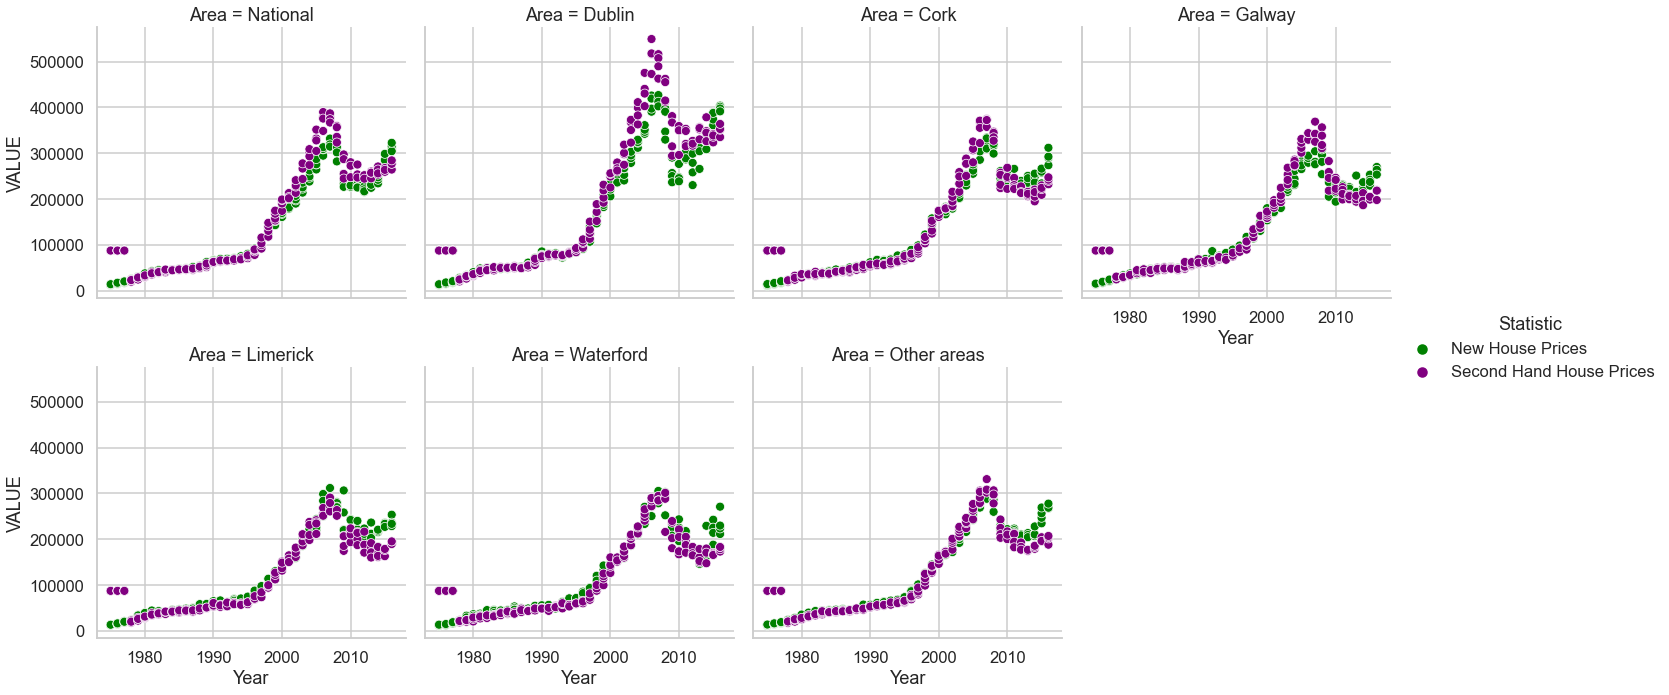

In [156]:
sns.relplot(data=natdf, x="Year", y="VALUE", hue="Statistic", col="Area", col_wrap=4)

### DUBLIN

In [157]:
dublin = df[df['Area']=='Dublin']
dublin

,STATISTIC,Statistic,TLIST(Q1),Quarter,C02343V02817,Area,UNIT,VALUE,Year
1,HSQ06C1,New House Prices,19751,1975Q1,01,Dublin,Euro,11858.0,1975
8,HSQ06C1,New House Prices,19752,1975Q2,01,Dublin,Euro,12804.0,1975
15,HSQ06C1,New House Prices,19753,1975Q3,01,Dublin,Euro,13153.0,1975
22,HSQ06C1,New House Prices,19754,1975Q4,01,Dublin,Euro,13835.0,1975
29,HSQ06C1,New House Prices,19761,1976Q1,01,Dublin,Euro,14770.0,1976
...,...,...,...,...,...,...,...,...,...
2318,HSQ06C2,Second Hand House Prices,20154,2015Q4,01,Dublin,Euro,338804.0,2015
2325,HSQ06C2,Second Hand House Prices,20161,2016Q1,01,Dublin,Euro,335123.0,2016
2332,HSQ06C2,Second Hand House Prices,20162,2016Q2,01,Dublin,Euro,351110.0,2016
2339,HSQ06C2,Second Hand House Prices,20163,2016Q3,01,Dublin,Euro,352880.0,2016


In [158]:
dublin_peak = dublin[dublin['Year']==2006]
dublin_peak

,STATISTIC,Statistic,TLIST(Q1),Quarter,C02343V02817,Area,UNIT,VALUE,Year
869,HSQ06C1,New House Prices,20061,2006Q1,01,Dublin,Euro,390629.0,2006
876,HSQ06C1,New House Prices,20062,2006Q2,01,Dublin,Euro,397337.0,2006
883,HSQ06C1,New House Prices,20063,2006Q3,01,Dublin,Euro,425925.0,2006
890,HSQ06C1,New House Prices,20064,2006Q4,01,Dublin,Euro,419330.0,2006
2045,HSQ06C2,Second Hand House Prices,20061,2006Q1,01,Dublin,Euro,472996.0,2006
2052,HSQ06C2,Second Hand House Prices,20062,2006Q2,01,Dublin,Euro,516589.0,2006
2059,HSQ06C2,Second Hand House Prices,20063,2006Q3,01,Dublin,Euro,549330.0,2006
2066,HSQ06C2,Second Hand House Prices,20064,2006Q4,01,Dublin,Euro,517865.0,2006


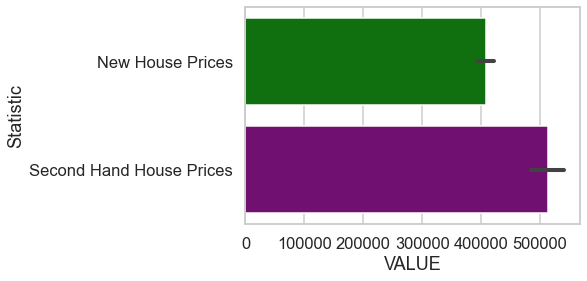

In [159]:
sns.barplot(x ='VALUE', y ='Statistic',data =dublin_peak);

In [53]:
limerick = df[df['Area']=='Limerick']
limerick

,STATISTIC,Statistic,TLIST(Q1),Quarter,C02343V02817,Area,UNIT,VALUE,Year
4,HSQ06C1,New House Prices,19751,1975Q1,04,Limerick,Euro,12565.0,1975
11,HSQ06C1,New House Prices,19752,1975Q2,04,Limerick,Euro,12714.0,1975
18,HSQ06C1,New House Prices,19753,1975Q3,04,Limerick,Euro,13643.0,1975
25,HSQ06C1,New House Prices,19754,1975Q4,04,Limerick,Euro,13337.0,1975
32,HSQ06C1,New House Prices,19761,1976Q1,04,Limerick,Euro,14776.0,1976
...,...,...,...,...,...,...,...,...,...
2321,HSQ06C2,Second Hand House Prices,20154,2015Q4,04,Limerick,Euro,178914.0,2015
2328,HSQ06C2,Second Hand House Prices,20161,2016Q1,04,Limerick,Euro,190031.0,2016
2335,HSQ06C2,Second Hand House Prices,20162,2016Q2,04,Limerick,Euro,189552.0,2016
2342,HSQ06C2,Second Hand House Prices,20163,2016Q3,04,Limerick,Euro,195294.0,2016


In [160]:
lim_peak = limerick[limerick['Year']==2006]
lim_peak

,STATISTIC,Statistic,TLIST(Q1),Quarter,C02343V02817,Area,UNIT,VALUE,Year
872,HSQ06C1,New House Prices,20061,2006Q1,04,Limerick,Euro,250330.0,2006
879,HSQ06C1,New House Prices,20062,2006Q2,04,Limerick,Euro,298878.0,2006
886,HSQ06C1,New House Prices,20063,2006Q3,04,Limerick,Euro,267873.0,2006
893,HSQ06C1,New House Prices,20064,2006Q4,04,Limerick,Euro,284078.0,2006
2048,HSQ06C2,Second Hand House Prices,20061,2006Q1,04,Limerick,Euro,256243.0,2006
2055,HSQ06C2,Second Hand House Prices,20062,2006Q2,04,Limerick,Euro,255352.0,2006
2062,HSQ06C2,Second Hand House Prices,20063,2006Q3,04,Limerick,Euro,268457.0,2006
2069,HSQ06C2,Second Hand House Prices,20064,2006Q4,04,Limerick,Euro,251420.0,2006


<AxesSubplot:xlabel='VALUE', ylabel='Statistic'>

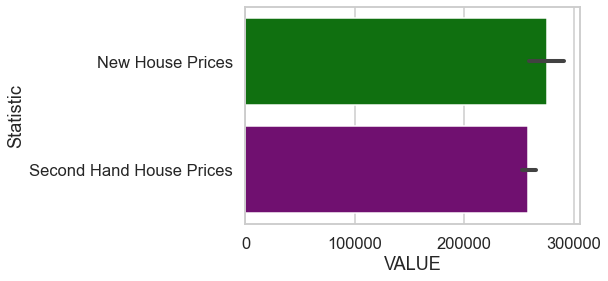

In [161]:
sns.barplot(x ='VALUE', y ='Statistic',data =lim_peak)

<AxesSubplot:xlabel='Quarter', ylabel='VALUE'>

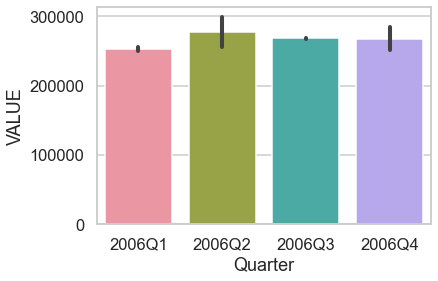

In [162]:
sns.barplot(x ='Quarter', y ='VALUE',data =lim_peak)

In [163]:
dublin.set_index('Year', inplace=True)
dublin

,STATISTIC,Statistic,TLIST(Q1),Quarter,C02343V02817,Area,UNIT,VALUE
Year,,,,,,,,
1975,HSQ06C1,New House Prices,19751,1975Q1,01,Dublin,Euro,11858.0
1975,HSQ06C1,New House Prices,19752,1975Q2,01,Dublin,Euro,12804.0
1975,HSQ06C1,New House Prices,19753,1975Q3,01,Dublin,Euro,13153.0
1975,HSQ06C1,New House Prices,19754,1975Q4,01,Dublin,Euro,13835.0
1976,HSQ06C1,New House Prices,19761,1976Q1,01,Dublin,Euro,14770.0
...,...,...,...,...,...,...,...,...
2015,HSQ06C2,Second Hand House Prices,20154,2015Q4,01,Dublin,Euro,338804.0
2016,HSQ06C2,Second Hand House Prices,20161,2016Q1,01,Dublin,Euro,335123.0
2016,HSQ06C2,Second Hand House Prices,20162,2016Q2,01,Dublin,Euro,351110.0


In [164]:
dub_val= dublin[["Statistic", "VALUE"]]

In [165]:
dub_val

,Statistic,VALUE
Year,,
1975,New House Prices,11858.0
1975,New House Prices,12804.0
1975,New House Prices,13153.0
1975,New House Prices,13835.0
1976,New House Prices,14770.0
...,...,...
2015,Second Hand House Prices,338804.0
2016,Second Hand House Prices,335123.0
2016,Second Hand House Prices,351110.0


In [166]:
dub_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 1975 to 2016
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Statistic  336 non-null    object 
 1   VALUE      336 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


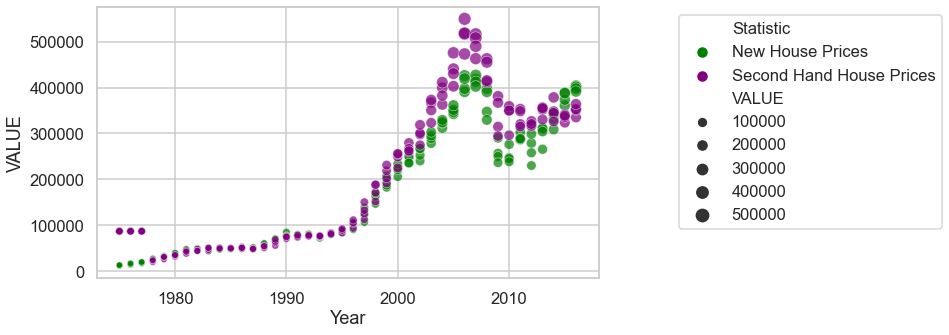

In [167]:
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette(["green", "purple"])
plt.figure(figsize=(9,5))
sns.scatterplot(data=dub_val, x='Year', y='VALUE', alpha=0.7, hue='Statistic', size='VALUE');
plt.legend(loc="upper right", bbox_to_anchor=(1.7,1))

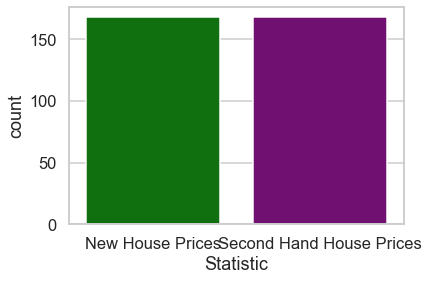

In [138]:
ax = sns.countplot(x="Statistic", data=nationaldf)

### Plotly

In [145]:
px.histogram(df, x="Area", y= "VALUE", color="Area",animation_frame="Year", title="House Prices Over Time")


In [149]:
px.scatter_3d(df, x=df.index, y="VALUE", z="Year", color="Area")